# Synthèse de filtres à partir du continu

On souhaite résaliser un filtre du second ordre résonnant avec  la méthode de la transformation bilinéaire.

Pour cela on redige un script capable de faire cette synthèse pour n'importe quelle fréquence naturelle $\omega_n$ et facteur d'amortissement $\zeta$.

$G(p) = \frac{\omega_n^2}{p^2+ 2\zeta\omega_n\,p+{\omega_n}^2}$


## 1  Vérification du calcul analytique

Dans le travail préparatoire vous avez pu trouver l'expression analytique des coefficients de la recurrence du filtre discret à partir de la transformée bilinéaire (ou trapezoidale ou tusin)de la forme :

$$
y[k]  =  a_1 y[k-1] + a_2 y[k-2] + b0 x[k] + b_1 x[k-1] + b_2 x[k-2]
$$

Faites un script qui donne la valeur de ces coefficients calculés avec votre formule théorique que vous comparerez avec ceux trouvés numériquement par la fonction **c2d** avec l'argument **"tustin"**.

On prendra $\omega_n=100$, $\zeta=0.1$ et $Fe=\frac{1000}{2\pi}$ pour faire cette comparaison.

Si ça ne colle pas pendant la séance de TP, continuez avec les valeurs numérique de c2d et revoyez vos calculs plus tard (homogénéité des coefficients etc. ?) 

## 2 Réponse harmonique 

Tracez la réponse harmonique du filtre continu et superposez-la avec celle de votre filtre numérique. Préférez l'utilisation de vecteurs  $f$, $p$, $z$ et des outils **plots** (comme dans les exemple du notebook de travail préparatoire) plutôt que les fonctions **bode** qui sont parfois obscures.


Vous devez constater que les fréquences de résonnance ne collent pas !
C'est l'effet de la fameuse compression des fréquences induite pas la méthode de la transformation bilinéaire.

###  Compression fréquentielle 
Dans la transformation  $ p = \frac{2}{Te}\frac{z-1}{z+1}$ utilisée, remplacez p par $i\omega_c$ d'un côté et z par son expression $e^{T_e\,i\,\omega}$. On obtient un nombre imaginaire des deux côtés mais avec une pulsation continue $\omega_c$ et une pulsation pour le discret $\omega$ qui sont différentes. 


Vous retrouvez ainsi la relation de compression entre pulsation en coninue $\omega_c$ et pulsation équivalente par la transormation bilinéaire $\omega$ :
$$ \omega_c = \frac{2}{T_e} tan(\frac{Te}{2}\omega)$$

On a donc égalité entre les expression  

$G(p=i\omega_c)=G\left(\frac{2}{Te}\frac{z-1}{z+1}= i \frac{2}{T_e} tan(\frac{Te}{2}\omega) \right)$ 

Ainsi, si le polynome $G(p)$ a une résonnance pour $\omega_c=\omega_n$ en continu, en discret $G\left(\frac{2}{Te}\frac{z-1}{z+1}\right)$ a une résonnace pour $\frac{2}{T_e} tan(\frac{Te}{2}\omega)=w_n$.

Retrouvez donc analytiquement cette fréquence de résonnance en discret et vérifiez que c'est bien cela qui est observé sur la réponse harmonique.

### Compensation fréquentielle 

Pour terminer, effectuez une précompensation de $\omega_n$ (donnez à votre expression un $omega_n'$ tel que une fois compressé par la transformation, la résonnance se fasse bien sur $\omega_n$) pour corriger le phénomène et obtenir le bon filtre résonnant.



## 3 Application : filtrage "overtone"

On désire appliquer ce filtre pour effecteur le même effet d'overtone que la chanteuse Ana Maria Hefele. Regardez l'explication sur [ce lien](https://www.youtube.com/watch?v=UHTF1-IhuC0)

Inspirez-vous du script ci-dessous (il est dans tp1_bilineaire.m) pour récupérer le signal et analyser son contenu harmonique, 

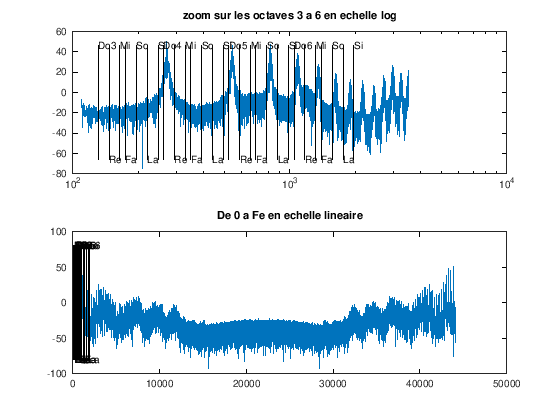

In [5]:
clear all; close all; clc;

[Y,Fs]=audioread("anna_a_mono.wav");
Y=Y(:,1); % récupère que le son gauche

N=length(Y);
t=((1:N)-1)/Fs;

Df=Fs/N;
f=0:Df:Fs-Df;

% fenetre audio interessante à regarder
fmin=440/4; %LA2
fmax=440*8; %LA7
aff= floor(fmin/Df):ceil(fmax/Df) ;

mag = abs(fft(Y(:,1)'));
subplot(211)
ax=semilogx(f(aff),20*log10(mag(aff))); 
title("zoom sur les octaves 3 a 6 en echelle log")
hold on;
octaves=afficher_grille_notes();
subplot(212)
ax=plot(f,20*log10(mag)); 
hold on;
afficher_grille_notes(octaves);
title("De 0 a Fe en echelle lineaire")

Ajustez votre second ordre pour qu'il amplifie la 5 ème harmonique avec +/- un demi ton de sélectivité (la fréquence fondamentale * 6 qui se trouve vers le sol de l'octave 6 ici).

Une octave correspondant à une miltiplication par 2, est décomposée en 12 demitons qui correspondent chacun à une multiplication par $2^{\frac{1}{12}}$. 

Appliquez la compensation en fréquence et synthétisé le filtre discret avec votre script. Affichez la réponse harmonique du filtre par dessus les même courbe pour vérifier que l'on amplifie bien cette harmonique.


Appliquez 1 à 3 fois ce filtre au signal pour obtenir un effet audible. (Utilisez la fonction filter ou bien une boucle for avec la récurrence) 


Quel serait l'ordre du filtre correspondat à 3 applications du même filtre, quelle est sa fonction de transfert, quel en sont les coefficients.
